# INM433 Visual Analytics Coursework




Student Name: **Ayliah Fani**

Project Title: **A Visual Exploration of Canadian Immigration**

***





**import libraries:**

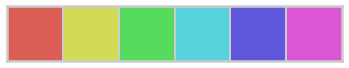

In [257]:
import pandas as pd
import geopandas as gpd
import altair as alt
import folium
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np

# setting seaborn figure aesthetics
sns.set(context='poster', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# set colours 
palette = sns.color_palette('hls')
sns.set_palette(palette)
sns.palplot(palette)

# setting pandas to show all rows and columns when acessing dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

***
## 1. Data Aquisition & Cleaning
### 1.1 Immigration by Country

#### Import

In [265]:
# import 'iimmigration by country' dataset
immigration = pd.read_excel('Canada.xlsx')

#### Immigration by Country

In [259]:
# get rid of top columns
immigration = immigration.dropna()

# rename columns to first row
immigration.columns = immigration.iloc[0]

# drop first row
immigration.drop(index=19, inplace = True, axis=0)

# drop unnecessary columns and rename columns
immigration.drop(columns=['Type', 'Coverage','AREA','REG','DEV'], inplace=True)

immigration.columns = ['Country','Continent','Region','Development',
                       '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                       '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                       '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                       '2010','2011','2012','2013']

In [260]:
#re-index dataframe
immigration.reset_index(drop=True, inplace=True)

#### Total Immigration per Year

In [261]:
# get the total immigration for each year
totals = pd.DataFrame(immigration.iloc[196])

# make index into column
totals = totals.reset_index(level=0, inplace=False)

# drop unneeded rows in the beginning
totals = totals.drop([0,1,2,3])
totals.reset_index(drop=True, inplace=True)

# rename columns
totals.columns = ['Year','Immigration']

# change data type
totals['Year'] = totals['Year'].astype('datetime64[ns]')
totals['Immigration'] = totals['Immigration'].astype('int64')

In [264]:
totals.head()

,Year,Immigration
0,1980-01-01,143137
1,1981-01-01,128641
2,1982-01-01,121175
3,1983-01-01,89185
4,1984-01-01,88272


### 1.2 Immigration by Region

In [308]:
# import 'immigration by region' dataset
df_region = pd.read_excel('Regions by Citizenship.xlsx')

# drop stylised header
df_region = df_region.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# rename columns to first row
df_region.columns = df_region.iloc[0]

# drop first row now that we've gottent the column names from it
df_region = df_region.drop([19])

# drop 'type' and 'coverage' columns
df_region.drop(columns=['Type', 'Coverage'], inplace=True)

df_region.columns = ['Continent','Region',
                       '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                       '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                       '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                       '2010','2011','2012','2013']

# drop 2013 since there is no data for it
df_region.drop(columns=['2013'], inplace=True)

# drop "northern america" since there is no data
df_region = df_region.drop([20])

# reindex
df_region.reset_index(drop=True, inplace=True)

#### Immigration by Continent

In [316]:
continents = df_region.groupby(df_region.Continent)
europe = continents.get_group("Europe")
oceania = continents.get_group("Oceania")
north_america = continents.get_group("Northern America")
asia = continents.get_group("Asia")
south_america = continents.get_group("Latin America and the Caribbean")
africa = continents.get_group("Africa")

#### Immigration by Region

In [317]:
df_region


,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,4404,6535,9729,7244.0,4046,4373.0,4254.0,3094,3056,3936,4825,4868,4049,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846.0
1,Africa,Middle Africa,33,27,44,32,42,30,61,100,91,119,185,328,575,534.0,412,702.0,1080.0,871,1129,1456,1847,1852,1699,1929,2452,2802,2834,2951,3034,3255,3369,3146,4602.0
2,Africa,Northern Africa,1100,1268,1348,936,842,840,1115,1864,2239,3574,4693,4745,4322,4119.0,4262,5875.0,6652.0,6304,5930,6706,8732,12201,11979,11355,12478,11323,12705,11750,13456,16320,19271,15712,15453.0
3,Africa,Southern Africa,1041,1126,791,387,297,327,725,1480,1329,1319,911,834,1071,1567.0,2371,1474.0,1324.0,1737,1354,1492,1778,1912,1515,1258,1203,1012,1148,1230,1184,1235,1306,1049,1348.0
4,Africa,Western Africa,306,301,210,222,271,319,427,1316,656,788,819,1786,3545,3067.0,1981,2382.0,2390.0,2465,2322,2406,3164,3459,3468,3016,4333,5303,5751,5684,5511,6802,8355,6578,7834.0
5,Africa Total,NaN,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531.0,13072,14806.0,15700.0,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083.0
6,Asia,Central Asia,..,..,..,..,..,..,..,..,..,..,..,..,15,81.0,89,105.0,230.0,728,1052,717,619,728,706,825,995,1134,903,936,805,962,905,769,1029.0
7,Asia,Eastern Asia,6836,8895,5481,3254,2624,2979,3416,5403,5887,7796,10544,17364,15258,14543.0,17091,18726.0,23667.0,25521,27142,38665,44651,47564,40598,44886,43550,50306,41763,35591,39602,37497,37954,35159,40449.0
8,Asia,South-Eastern Asia,8693,9191,9022,8845,12161,9787,7801,10368,13542,19132,19713,21294,21775,29655.0,26847,21403.0,17844.0,14780,11503,12957,15174,18517,16769,16803,18056,22809,25105,27256,30614,34166,44199,40494,37695.0
9,Asia,Southern Asia,11315,11566,11591,10157,9607,7654,12468,19947,20225,20611,23353,32853,40522,41832.0,35472,40456.0,50843.0,54828,41239,44762,62625,68137,67420,57106,58521,69510,66742,56032,54154,53083,62284,53673,60568.0


***
## 2. Visualisations
### 2.1 Immigration per Year

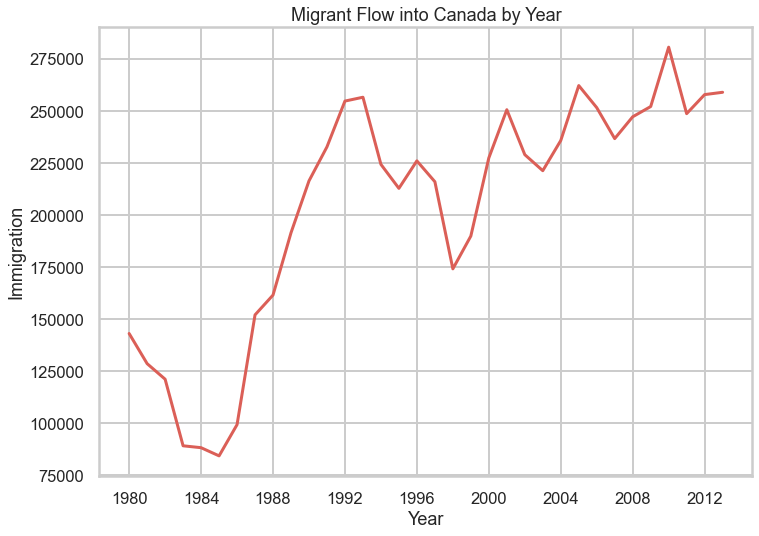

In [263]:
sns.lineplot(data=totals, x='Year', y='Immigration');
plt.title('Migrant Flow into Canada by Year');